## Feature importance analysis for the language cognitive composite score and all scores

In [1]:
import pandas as pd
import numpy as npa
import matplotlib.pyplot as plt
import shap
import os
import numpy as np
import json
import pickle
from pandas.testing import assert_frame_equal, assert_series_equal
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator

/Users/jheitz/miniconda3/envs/phd/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
target = 'composite_language'


def get_results_dir(target):
    if target == 'composite_language':
        results_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1550_combined_audio_linguistic_pictureDescription_composite_language_zfmg"
    elif target == 'composite_speed':
        results_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1638_combined_audio_linguistic_pictureDescription_composite_speed_mqxr"
    elif target == 'composite_memory':
        results_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1606_combined_audio_linguistic_pictureDescription_composite_memory_wnro"
    elif target == 'composite_executive_function':
        results_dir = "/Volumes/g_psyplafor_methlab$/Students/Jonathan/results/runs_luha/2025_kw11/20250314_1550_7a0f_svr_reduced_feature_sets_shap_and_data/20250314_1622_combined_audio_linguistic_pictureDescription_composite_executive_function_uryt"
        
    return results_dir


In [3]:
shap_values = pd.read_csv(os.path.join(get_results_dir(target), 'shap_values.csv'))
shap_values

,lit_verb_noun_ratio,lit_subordinate_coordinate_conjunction_ratio,lit_adverb_ratio,lit_noun_ratio,lit_verb_ratio,lit_pronoun_ratio,lit_personal_pronoun_ratio,lit_determiner_ratio,lit_preposition_ratio,lit_verb_present_participle_ratio,...,smile_spectralFluxUV_sma3nz_amean,smile_loudnessPeaksPerSec,smile_VoicedSegmentsPerSec,smile_MeanUnvoicedSegmentLength,smile_equivalentSoundLevel_dBp,dem_age,dem_gender_unified,dem_education_binary,dem_country,split_idx
0,0.019775,-0.016199,0.016089,0.032676,0.000668,-0.001545,0.028873,0.070322,0.033853,0.009925,...,-0.009668,0.004654,0.014903,-0.037224,-0.000316,-0.139635,0.023166,0.062404,0.131921,0
1,0.012991,0.018844,-0.085712,0.006027,0.014020,-0.002010,0.001773,-0.009247,-0.008851,0.007108,...,0.003300,0.000385,-0.002223,-0.002152,0.011758,-0.078492,0.015610,-0.113630,0.115171,0
2,0.019093,0.000194,0.059615,0.024138,0.011547,0.005120,0.006819,0.019344,0.020130,-0.024415,...,-0.018978,0.001634,0.000279,0.012187,-0.004284,0.085739,0.009837,0.063727,-0.092492,0
3,-0.050187,0.002196,-0.069090,-0.047587,-0.013476,0.012543,-0.020973,-0.123329,-0.000376,0.008344,...,0.002978,0.004353,0.006270,0.011538,0.009904,0.026388,-0.027348,0.054931,-0.104917,0
4,0.004609,-0.001935,-0.005957,0.005016,0.002873,-0.007614,0.017001,0.043429,0.025721,0.009257,...,0.001710,0.000087,-0.062564,0.011595,-0.013569,-0.081979,-0.029771,-0.068966,0.105781,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,0.022785,0.004632,0.016945,0.012571,0.024033,0.005084,0.007871,0.017653,0.021463,-0.014042,...,0.002994,0.021159,-0.037452,0.012749,0.012555,0.066799,-0.039849,0.070200,0.121086,9
779,-0.005603,0.003230,-0.101755,-0.011446,0.004697,0.001318,0.000011,-0.040873,0.003319,0.006745,...,0.020000,0.007124,-0.003491,0.013043,0.005869,0.011570,0.008221,-0.073624,-0.054883,9
780,0.029946,-0.011939,0.012504,0.023605,0.028007,-0.001789,0.009785,0.015609,0.025221,0.000332,...,-0.038879,0.006483,-0.017838,0.013121,0.006773,0.055946,0.021105,-0.143805,0.101168,9
781,0.001796,0.006321,0.049956,0.006413,0.000912,0.004499,0.013853,0.052106,-0.009809,-0.008467,...,0.009637,0.007144,-0.009907,0.011003,-0.002281,-0.011513,0.018297,0.058024,0.120745,9


In [4]:
shap_values.columns

Index(['lit_verb_noun_ratio', 'lit_subordinate_coordinate_conjunction_ratio',
       'lit_adverb_ratio', 'lit_noun_ratio', 'lit_verb_ratio',
       'lit_pronoun_ratio', 'lit_personal_pronoun_ratio',
       'lit_determiner_ratio', 'lit_preposition_ratio',
       'lit_verb_present_participle_ratio', 'lit_verb_modal_ratio',
       'lit_verb_third_person_singular_ratio', 'lit_interjection_ratio',
       'lit_NP -> PRP', 'lit_VP -> VBG', 'lit_VP -> VBG_PP', 'lit_INTJ -> UH',
       'lit_NP_ratio', 'lit_VP_ratio', 'lit_avg_n_words_in_NP', 'lit_n_words',
       'lit_avg_word_length', 'lit_words_not_in_dict_ratio',
       'lit_brunets_index', 'lit_honores_statistic', 'lit_mattr', 'lit_NDW-50',
       'lit_flesch_kincaid', 'lit_avg_distance_between_utterances',
       'lit_propositional_density', 'lit_content_density',
       'sung_frequency_noun', 'sung_AoA_noun', 'sung_familiarity_noun',
       'sung_ambiguity_noun', 'sung_concreteness_noun',
       'pause_fraction_of_pause', 'pause_mean_paus

In [6]:
X_test_collected  = []#

for split in range(10):
    #continue
    X_test = pd.read_csv(os.path.join(get_results_dir(target), f"X_test_split{split}.csv"))
    X_test_collected.append(X_test)
    shap_split = shap_values.query(f"split_idx == {split}").drop(columns=['split_idx'])
    print(shap_split.shape, X_test.shape, set(shap_split.columns) - set(X_test.columns), set(X_test.columns) - set(shap_split.columns))
    #plt.figure(figsize=(4,6))
    #shap.summary_plot(shap_split.to_numpy(), X_test, show=True, plot_size=(3,5))
    #plt.show()

X_test_combined = pd.concat(X_test_collected, axis=0)



(79, 66) (79, 66) set() set()
(79, 66) (79, 66) set() set()
(79, 66) (79, 66) set() set()
(78, 66) (78, 66) set() set()
(78, 66) (78, 66) set() set()
(78, 66) (78, 66) set() set()
(78, 66) (78, 66) set() set()
(78, 66) (78, 66) set() set()
(78, 66) (78, 66) set() set()
(78, 66) (78, 66) set() set()


In [8]:

name_replacement = {
    'mattr': 'moving_average_type_token_ratio',
    'education_binary': 'education',
    'frequency_nou': 'noun_frequency',
    'AoA_noun': 'noun_age_of_acquisition',
    'familiarity_noun': 'noun_familiarity',
    'ambiguity_noun': 'noun_ambiguity',
    'concreteness_noun': 'noun_concreteness',
    'NDW-50': 'n_unique_in_50',
    'gender_unified': 'gender',
}


def format_feature_name(f):
    #print(f)
    group, name = f[:f.index('_')], f[f.index('_')+1:]
    name = name.replace("->", r"$\rightarrow$")
    name = name_replacement.get(name, name)
    #group = group.replace("sung", "Ling|Lexical").replace("lit", "Ling|Base").replace("phon", "Acou|Speed").replace("pause", "Acou|Pause").replace("smile", "Acou|eGeMAPs").replace("dem", "Demographic")
    group = group.replace("sung", "Linguistic").replace("lit", "Linguistic").replace("phon", "Acou|Hand-crafted").replace("pause", "Acou|Hand-crafted").replace("smile", "Acoustic|eGeMAPs").replace("dem", "Demographic")
    group = r"~"*(17-len(group)) + group  # add left padding
    return name + " " + r"{\footnotesize\texttt{" + group + r"}}"

def feature_name_to_color(f):
    group, name = f[:f.index('_')], f[f.index('_')+1:]
    return {
        'lit': 'royalblue',
        'sung': 'skyblue',
        'phon': 'red',
        'pause': 'darkorange',
        'smile': 'khaki',
    }.get(group, 'white')
 


In [9]:
import matplotlib.pyplot as pl
import numpy as np
import scipy.cluster
import scipy.sparse
import scipy.spatial
from scipy.stats import gaussian_kde

from shap import Explanation
from shap.plots._labels import labels
from shap.plots._utils import (
    convert_color,
    convert_ordering,
    get_sort_order,
    merge_nodes,
    sort_inds,
)
from shap.utils import safe_isinstance
from shap.utils._exceptions import DimensionError
from shap.plots import colors



def format_feature_name(f):
    if not '_' in f:
        return f
    group, name = f[:f.index('_')], f[f.index('_')+1:]
    name = name.replace("->", r"$\rightarrow$")
    name = name_replacement.get(name, name)
    #group = group.replace("sung", "Ling|Lexical").replace("lit", "Ling|Base").replace("phon", "Acou|Speed").replace("pause", "Acou|Pause").replace("smile", "Acou|eGeMAPs").replace("dem", "Demographic")
    group = group.replace("sung", "Linguistic").replace("lit", "Linguistic").replace("phon", "Acou|Hand-crafted").replace("pause", "Acou|Hand-crafted").replace("smile", "Acoustic|eGeMAPs").replace("dem", "Demographic")
    group = r"~"*(17-len(group)) + group  # add left padding
    return name + " " + r"{\small\texttt{" + group + r"}}"


def beeswarm(shap_values, max_display=10, order=Explanation.abs.mean(0),
             clustering=None, cluster_threshold=0.5, color=None,
             axis_color="#333333", alpha=1, show=True, log_scale=False,
             color_bar=True, plot_size="auto", color_bar_label=labels["FEATURE_VALUE"]):
    """Create a SHAP beeswarm plot, colored by feature values when they are provided.

    Parameters
    ----------
    shap_values : Explanation
        This is an :class:`.Explanation` object containing a matrix of SHAP values
        (# samples x # features).

    max_display : int
        How many top features to include in the plot (default is 10, or 7 for
        interaction plots).

    show : bool
        Whether ``matplotlib.pyplot.show()`` is called before returning.
        Setting this to ``False`` allows the plot
        to be customized further after it has been created.

    color_bar : bool
        Whether to draw the color bar (legend).

    plot_size : "auto" (default), float, (float, float), or None
        What size to make the plot. By default, the size is auto-scaled based on the
        number of features that are being displayed. Passing a single float will cause
        each row to be that many inches high. Passing a pair of floats will scale the
        plot by that number of inches. If ``None`` is passed, then the size of the
        current figure will be left unchanged.

    Examples
    --------

    See `beeswarm plot examples <https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/beeswarm.html>`_.

    """

    if not isinstance(shap_values, Explanation):
        emsg = (
            "The beeswarm plot requires an `Explanation` object as the "
            "`shap_values` argument."
        )
        raise TypeError(emsg)

    sv_shape = shap_values.shape
    if len(sv_shape) == 1:
        emsg = (
            "The beeswarm plot does not support plotting a single instance, please pass "
            "an explanation matrix with many instances!"
        )
        raise ValueError(emsg)
    elif len(sv_shape) > 2:
        emsg = (
            "The beeswarm plot does not support plotting explanations with instances that have more "
            "than one dimension!"
        )
        raise ValueError(emsg)

    shap_exp = shap_values
    # we make a copy here, because later there are places that might modify this array
    values = np.copy(shap_exp.values)
    features = shap_exp.data
    if scipy.sparse.issparse(features):
        features = features.toarray()
    feature_names = shap_exp.feature_names

    order = convert_ordering(order, values)

    # default color:
    if color is None:
        if features is not None:
            color = colors.red_blue
        else:
            color = colors.blue_rgb
    color = convert_color(color)

    idx2cat = None
    # convert from a DataFrame or other types
    if str(type(features)) == "<class 'pandas.core.frame.DataFrame'>":
        if feature_names is None:
            feature_names = features.columns
        # feature index to category flag
        idx2cat = features.dtypes.astype(str).isin(["object", "category"]).tolist()
        features = features.values
    elif isinstance(features, list):
        if feature_names is None:
            feature_names = features
        features = None
    elif (features is not None) and len(features.shape) == 1 and feature_names is None:
        feature_names = features
        features = None

    num_features = values.shape[1]

    if features is not None:
        shape_msg = (
            "The shape of the shap_values matrix does not match the shape "
            "of the provided data matrix."
        )
        if num_features - 1 == features.shape[1]:
            shape_msg += (
                " Perhaps the extra column in the shap_values matrix is the "
                "constant offset? If so, just pass shap_values[:,:-1]."
            )
            raise DimensionError(shape_msg)
        if num_features != features.shape[1]:
            raise DimensionError(shape_msg)

    if feature_names is None:
        feature_names = np.array([labels['FEATURE'] % str(i) for i in range(num_features)])

    if log_scale:
        pl.xscale('symlog')

    if clustering is None:
        partition_tree = getattr(shap_values, "clustering", None)
        if partition_tree is not None and partition_tree.var(0).sum() == 0:
            partition_tree = partition_tree[0]
        else:
            partition_tree = None
    elif clustering is False:
        partition_tree = None
    else:
        partition_tree = clustering

    if partition_tree is not None:
        assert partition_tree.shape[1] == 4, "The clustering provided by the Explanation object does not seem to be a partition tree (which is all shap.plots.bar supports)!"

    # determine how many top features we will plot
    if max_display is None:
        max_display = len(feature_names)
    num_features = min(max_display, len(feature_names))

    # iteratively merge nodes until we can cut off the smallest feature values to stay within
    # num_features without breaking a cluster tree
    orig_inds = [[i] for i in range(len(feature_names))]
    orig_values = values.copy()
    while True:
        feature_order = convert_ordering(order, Explanation(np.abs(values)))
        if partition_tree is not None:

            # compute the leaf order if we were to show (and so have the ordering respect) the whole partition tree
            clust_order = sort_inds(partition_tree, np.abs(values))

            # now relax the requirement to match the parition tree ordering for connections above cluster_threshold
            dist = scipy.spatial.distance.squareform(scipy.cluster.hierarchy.cophenet(partition_tree))
            feature_order = get_sort_order(dist, clust_order, cluster_threshold, feature_order)

            # if the last feature we can display is connected in a tree the next feature then we can't just cut
            # off the feature ordering, so we need to merge some tree nodes and then try again.
            if max_display < len(feature_order) and dist[feature_order[max_display-1],feature_order[max_display-2]] <= cluster_threshold:
                #values, partition_tree, orig_inds = merge_nodes(values, partition_tree, orig_inds)
                partition_tree, ind1, ind2 = merge_nodes(np.abs(values), partition_tree)
                for i in range(len(values)):
                    values[:,ind1] += values[:,ind2]
                    values = np.delete(values, ind2, 1)
                    orig_inds[ind1] += orig_inds[ind2]
                    del orig_inds[ind2]
            else:
                break
        else:
            break

    # here we build our feature names, accounting for the fact that some features might be merged together
    feature_inds = feature_order[:max_display]
    feature_names_new = []
    for pos,inds in enumerate(orig_inds):
        if len(inds) == 1:
            feature_names_new.append(feature_names[inds[0]])
        elif len(inds) <= 2:
            feature_names_new.append(" + ".join([feature_names[i] for i in inds]))
        else:
            max_ind = np.argmax(np.abs(orig_values).mean(0)[inds])
            feature_names_new.append(feature_names[inds[max_ind]] + " + %d other features" % (len(inds)-1))
    feature_names = feature_names_new

    # see how many individual (vs. grouped at the end) features we are plotting
    if num_features < len(values[0]):
        num_cut = np.sum([len(orig_inds[feature_order[i]]) for i in range(num_features-1, len(values[0]))])
        values[:,feature_order[num_features-1]] = np.sum([values[:,feature_order[i]] for i in range(num_features-1, len(values[0]))], 0)

    # build our y-tick labels
    yticklabels = [feature_names[i] for i in feature_inds]
    if num_features < len(values[0]):
        yticklabels[-1] = "Sum of %d other features" % num_cut
        
    # jheitz custom
    yticklabels = [format_feature_name(f) for f in yticklabels]

    row_height = 0.4
    if plot_size == "auto":
        pl.gcf().set_size_inches(8, min(len(feature_order), max_display) * row_height + 1.5)
    elif type(plot_size) in (list, tuple):
        pl.gcf().set_size_inches(plot_size[0], plot_size[1])
    elif plot_size is not None:
        pl.gcf().set_size_inches(8, min(len(feature_order), max_display) * plot_size + 1.5)
    pl.axvline(x=0, color="#999999", zorder=-1)

    # make the beeswarm dots
    for pos, i in enumerate(reversed(feature_inds)):
        pl.axhline(y=pos, color="#cccccc", lw=0.5, dashes=(1, 5), zorder=-1)
        shaps = values[:, i]
        fvalues = None if features is None else features[:, i]
        inds = np.arange(len(shaps))
        np.random.shuffle(inds)
        if fvalues is not None:
            fvalues = fvalues[inds]
        shaps = shaps[inds]
        colored_feature = True
        try:
            if idx2cat is not None and idx2cat[i]: # check categorical feature
                colored_feature = False
            else:
                fvalues = np.array(fvalues, dtype=np.float64)  # make sure this can be numeric
        except Exception:
            colored_feature = False
        N = len(shaps)
        # hspacing = (np.max(shaps) - np.min(shaps)) / 200
        # curr_bin = []
        nbins = 100
        quant = np.round(nbins * (shaps - np.min(shaps)) / (np.max(shaps) - np.min(shaps) + 1e-8))
        inds = np.argsort(quant + np.random.randn(N) * 1e-6)
        layer = 0
        last_bin = -1
        ys = np.zeros(N)
        for ind in inds:
            if quant[ind] != last_bin:
                layer = 0
            ys[ind] = np.ceil(layer / 2) * ((layer % 2) * 2 - 1)
            layer += 1
            last_bin = quant[ind]
        ys *= 0.9 * (row_height / np.max(ys + 1))

        if safe_isinstance(color, "matplotlib.colors.Colormap") and features is not None and colored_feature:
            # trim the color range, but prevent the color range from collapsing
            vmin = np.nanpercentile(fvalues, 5)
            vmax = np.nanpercentile(fvalues, 95)
            if vmin == vmax:
                vmin = np.nanpercentile(fvalues, 1)
                vmax = np.nanpercentile(fvalues, 99)
                if vmin == vmax:
                    vmin = np.min(fvalues)
                    vmax = np.max(fvalues)
            if vmin > vmax: # fixes rare numerical precision issues
                vmin = vmax

            assert features.shape[0] == len(shaps), "Feature and SHAP matrices must have the same number of rows!"

            # plot the nan fvalues in the interaction feature as grey
            nan_mask = np.isnan(fvalues)
            pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,
                        vmax=vmax, s=16, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)

            # plot the non-nan fvalues colored by the trimmed feature value
            cvals = fvalues[np.invert(nan_mask)].astype(np.float64)
            cvals_imp = cvals.copy()
            cvals_imp[np.isnan(cvals)] = (vmin + vmax) / 2.0
            cvals[cvals_imp > vmax] = vmax
            cvals[cvals_imp < vmin] = vmin
            pl.scatter(shaps[np.invert(nan_mask)], pos + ys[np.invert(nan_mask)],
                        cmap=color, vmin=vmin, vmax=vmax, s=10,
                        c=cvals, alpha=alpha, linewidth=0,
                        zorder=3, rasterized=len(shaps) > 500)
        else:

            pl.scatter(shaps, pos + ys, s=16, alpha=alpha, linewidth=0, zorder=3,
                        color=color if colored_feature else "#777777", rasterized=len(shaps) > 500)


    # draw the color bar
    if safe_isinstance(color, "matplotlib.colors.Colormap") and color_bar and features is not None:
        import matplotlib.cm as cm
        m = cm.ScalarMappable(cmap=color)
        m.set_array([0, 1])
        cb = pl.colorbar(m, ax=pl.gca(), ticks=[0, 1], aspect=20, shrink=0.3)
        cb.set_ticklabels([labels['FEATURE_VALUE_LOW'], labels['FEATURE_VALUE_HIGH']], fontsize=10)
        cb.set_label(color_bar_label, size=10, labelpad=0)
        cb.ax.tick_params(labelsize=11, length=0)
        cb.set_alpha(1)
        cb.outline.set_visible(False)


    pl.gca().xaxis.set_ticks_position('bottom')
    pl.gca().yaxis.set_ticks_position('none')
    pl.gca().spines['right'].set_visible(False)
    pl.gca().spines['top'].set_visible(False)
    pl.gca().spines['left'].set_visible(False)
    pl.gca().tick_params(color=axis_color, labelcolor=axis_color)
    pl.yticks(range(len(feature_inds)), reversed(yticklabels), fontsize=10)
    pl.gca().tick_params('y', length=20, width=0.5, which='major')
    pl.gca().tick_params('x', labelsize=11)
    pl.ylim(-1, len(feature_inds))
    pl.xlabel(labels['VALUE'], fontsize=10)
    if show:
        pl.show()

/var/folders/r9/m9sbl76n2l35rg8_r625jr1m0000gn/T/ipykernel_12177/3586115941.py:286: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  pl.scatter(shaps[nan_mask], pos + ys[nan_mask], color="#777777", vmin=vmin,


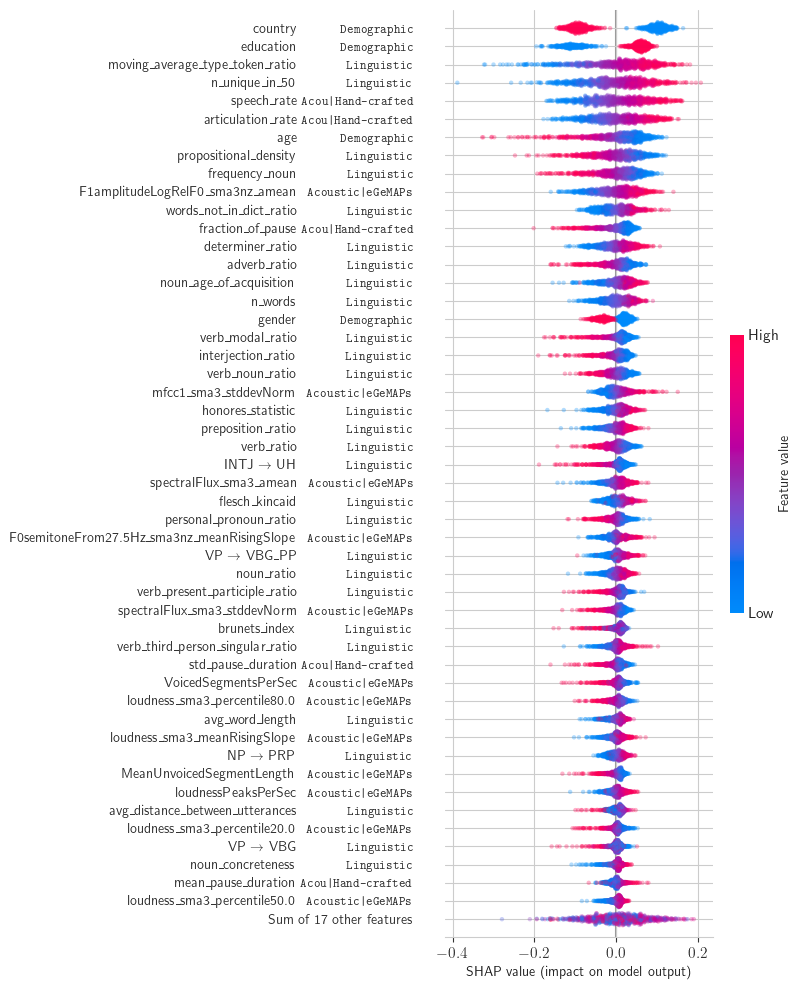

In [11]:
explanation = shap.Explanation(
            values=shap_values.drop(columns=['split_idx']).values,
            base_values=np.zeros(shap_values.shape[1]),
            data=X_test_combined,
            feature_names=shap_values.columns,
        )

import matplotlib.colors as pltcolors

colormap = pltcolors.LinearSegmentedColormap.from_list("custom", ['#ffb3ba', '#bae1ff']) # pastel
colormap = pltcolors.LinearSegmentedColormap.from_list("custom", ['#fdae61', '#ffffbf', '#abd9e9']) # diverging subset
colormap = pltcolors.LinearSegmentedColormap.from_list("custom", ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']) # diverging 
colormap = pltcolors.LinearSegmentedColormap.from_list("custom", ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']) # diverging 
colormap = None

with plt.rc_context({"text.usetex": True, "font.family": "sans-serif"}):       
    beeswarm(explanation, max_display=50, plot_size=(8,10), color=colormap, alpha=0.3, show=False)
    plt.tight_layout()
    plt.savefig("plots/feature_importance_language.pdf")
    plt.savefig("plots/feature_importance_language.eps")
    plt.show()
#shap.summary_plot(shap_values.drop(columns=['split_idx']).to_numpy(), X_test_combined)

In [12]:
shap_values.shape, X_test_combined.shape

((783, 67), (783, 66))

In [13]:
feature_importances_per_split = {}
feature_importances_mean_over_all_participants = {}

for target in ['composite_language', 'composite_executive_function', 'composite_speed', 'composite_memory', ]:
    print(target)
    shap_values_target = pd.read_csv(os.path.join(get_results_dir(target), 'shap_values.csv'))
    feature_importances_target_split = shap_values_target.abs().groupby('split_idx').mean()
        
    feature_importances_mean_over_all_participants[target] = feature_importances_target_split.mean()
    feature_importances_per_split[target] = feature_importances_target_split
    

composite_language
composite_executive_function
composite_speed
composite_memory


In [14]:
feature_importances_mean_df = pd.DataFrame(feature_importances_mean_over_all_participants)
feature_importances_mean_df['mean_feature_importance'] = feature_importances_mean_df.mean(axis=1)
feature_importances_mean_df = feature_importances_mean_df.sort_values(by='mean_feature_importance', ascending=False)#.drop(columns=['mean_feature_importance'])
feature_importances_mean_df

,composite_language,composite_executive_function,composite_speed,composite_memory,mean_feature_importance
dem_age,0.052479,0.070655,0.059404,0.018662,0.050300
lit_mattr,0.067779,0.060692,0.035067,0.023656,0.046799
dem_education_binary,0.078549,0.033866,0.009087,0.062606,0.046027
lit_NDW-50,0.061953,0.057586,0.044461,0.013477,0.044369
dem_gender_unified,0.026752,0.024263,0.029739,0.091143,0.042974
...,...,...,...,...,...
sung_ambiguity_noun,0.009565,0.011083,0.008303,0.009873,0.009706
lit_content_density,0.009599,0.008043,0.007833,0.012895,0.009593
lit_subordinate_coordinate_conjunction_ratio,0.008678,0.008883,0.012143,0.008423,0.009532
smile_equivalentSoundLevel_dBp,0.010417,0.008982,0.011342,0.007266,0.009502


In [15]:
feature_importances_mean_df = feature_importances_mean_df.drop(columns=['mean_feature_importance'])

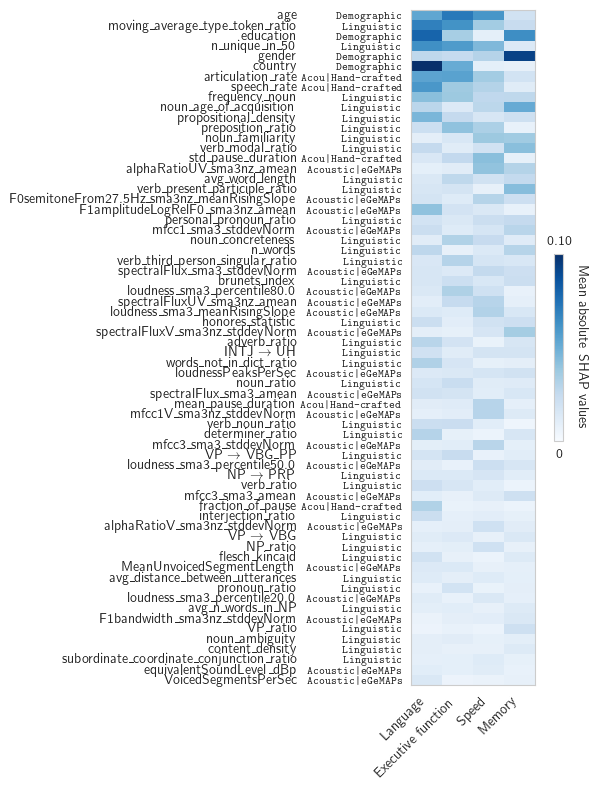

In [16]:
import seaborn as sns

name_replacement = {
    'mattr': 'moving_average_type_token_ratio',
    'education_binary': 'education',
    'frequency_nou': 'noun_frequency',
    'AoA_noun': 'noun_age_of_acquisition',
    'familiarity_noun': 'noun_familiarity',
    'ambiguity_noun': 'noun_ambiguity',
    'concreteness_noun': 'noun_concreteness',
    'NDW-50': 'n_unique_in_50',
    'gender_unified': 'gender',

}


def format_feature_name(f):
    group, name = f[:f.index('_')], f[f.index('_')+1:]
    name = name.replace("->", r"$\rightarrow$")
    name = name_replacement.get(name, name)
    #group = group.replace("sung", "Ling|Lexical").replace("lit", "Ling|Base").replace("phon", "Acou|Speed").replace("pause", "Acou|Pause").replace("smile", "Acou|eGeMAPs").replace("dem", "Demographic")
    group = group.replace("sung", "Linguistic").replace("lit", "Linguistic").replace("phon", "Acou|Hand-crafted").replace("pause", "Acou|Hand-crafted").replace("smile", "Acoustic|eGeMAPs").replace("dem", "Demographic")

    group = r"~"*(17-len(group)) + group  # add left padding
    return name + " " + r"{\footnotesize\texttt{" + group + r"}}"

def format_target(t):
    return t.replace("composite_", "").replace("_", " ").capitalize()

def feature_name_to_color(f):
    group, name = f[:f.index('_')], f[f.index('_')+1:]
    return {
        'lit': 'royalblue',
        'sung': 'skyblue',
        'phon': 'red',
        'pause': 'darkorange',
        'smile': 'khaki',
    }.get(group, 'white')
 


with plt.rc_context({"text.usetex": True, "font.family": "sans-serif"}):
#if True:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,8))

    #sns.heatmap(feature_importances_df.drop(columns=['mean_feature_importance']), cmap="Blues", ax=ax, cbar_kws={'shrink': 0.3}, yticklabels=True)
    heatmap = ax.imshow(feature_importances_mean_df, cmap="Blues", aspect=0.33, vmin=0)

    ax.set_yticks(np.arange(len(feature_importances_mean_df.index)), [format_feature_name(f) for f in feature_importances_mean_df.index], va='center')  # , rotation=45, ha='right'
    ax.set_xticks(np.arange(len(feature_importances_mean_df.columns)), [format_target(f) for f in feature_importances_mean_df.columns], rotation=45, ha='right')
    #ax.set_title(version)
    #ax.set_xlabel("Mean absolute SHAP value")
    with plt.rc_context({'ytick.color':'#00000000'}):
        cbar = fig.colorbar(heatmap, fraction=0.02, pad=0.04)
        cbar.ax.set_ylabel('Mean absolute SHAP values', rotation=270)
        max_feature_importance = feature_importances_mean_df.max().max()
        label_offset = max_feature_importance * 0.07
        cbar.ax.text(0.6, -label_offset, '0', va='center', ha='center')
        cbar.ax.text(0.6, max_feature_importance+label_offset, f"{max_feature_importance:.2f}", va='center', ha='center')
        cbar.ax.tick_params(axis='y', labelsize=3)
        ax.grid(False)
    
    
    plt.tight_layout()
    plt.savefig("plots/feature_importance_all_targets.pdf")
    plt.savefig("plots/feature_importance_all_targets.eps")
    plt.savefig("plots/feature_importance_all_targets.svg")
    plt.show()
